<a href="https://colab.research.google.com/github/adityaharshsingh7/Elevate-labs-internship-6-5-25/blob/main/Elevate_labs_internship_6_5_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)
# Load dataset
data = pd.read_csv(path +'/Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

100%|██████████| 1.55k/1.55k [00:00<00:00, 2.55MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Elbow method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

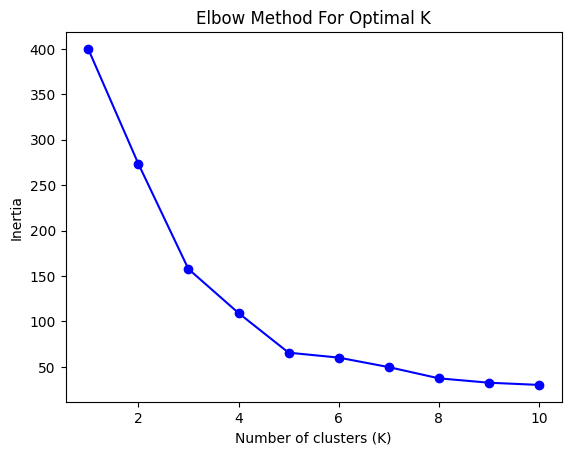

In [5]:
# Plot Elbow Curve
plt.figure()
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
data['Cluster'] = y_kmeans

# PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

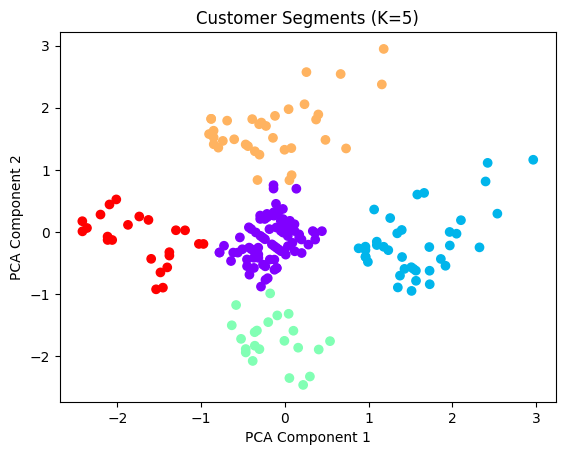

Silhouette Score: 0.55


In [7]:
# Plot Clusters
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='rainbow')
plt.title("Customer Segments (K=5)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Silhouette Score
score = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {score:.2f}')